**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### Business Understanding

We have a business challenge to discover what influences the price of used cars. We'll apply CRISP-DM and several Machine Learning techniques to achieve this goal!

### problem statement 

As a used car dealer, staying on top of the constantly changing market value of your cars is an essential part of running a successful business. To remain competitive in this space, predicting the true worthof each vehicle based on its attributes can be critical to accurate pricing and increased customer interest. Developing a predictive model that considers factors such as make, model year, mileage and condition could help ensure you get more bang for your buck when setting prices and attract new customers.

Several machine learning models can be used to predict the value of a user's car. The choice of model depends on several factors, including the size and quality of the available data, the complexity of the problem, and the desired level of accuracy. Some of the commonly used models for car value prediction include:

1.	Linear regression: This simple model fits a linear equation to the data to predict the car's value. It works well with a linear relationship between the input features and the output value.
2.	Random Forest: This is a powerful model that can handle both categorical and continuous features. It works well when there are many input features, and the relationship between them and the output value is complex.
3.	Gradient Boosting: This model uses an ensemble of weak learners to make predictions. It works well when there are many input features, and the relationship between them and the output value is complex.
4.	Neural Networks: This powerful model can handle complex relationships between the input features and the output value. It works well when a large amount of data is available, and the relationship between the input features and the output value is non-linear.

It is important to note that the model's accuracy depends on the quality and quantity of the data used for training. Therefore, having a large, diverse, and high-quality dataset is essential to train the model for accurate predictions.


The business problem could involve addressing the following questions:

1. How can we develop a predictive model that accurately estimates the value of a used car based on its attributes?
2. Which features are the most important in determining the value of a used car?
3. How can we validate the accuracy of the predictive model?
4. How can we use the predictive model to set competitive prices for our used cars?
5. How can we update the predictive model to reflect changes in the market and in the availability of data?

By addressing these questions, the used car dealer could develop a data-driven approach to pricing their used cars that takes into account the unique features of each car and the current market conditions. This could lead to increased customer satisfaction, increased sales, and improved profitability for the dealership.





We are exploring two innovative approaches to predicting the value of used cars from a dataset containing three million entries. The first method is linear regression, an intuitive machine learning technique which draws meaningful insights from data using mathematical models and equations. Our second approach involves KMeans(), a powerful clustering algorithm provided by scikit-learn library in Python that organizes similar data points into clusters for unsupervised learning. By randomly selecting K centroids and iteratively assigning them until convergence is reached, we can gain valuable insight about how car attributes shape their market value!

In [191]:
import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Processing
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.kernel_approximation import Nystroem
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


import seaborn as sns
import matplotlib.pyplot as plt




data/vehicles.csv


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [192]:

UsedCar_data = pd.read_csv('data/vehicles.csv')



In [193]:
print(f'''number of rows - {UsedCar_data.shape[0]}
number of columns - {UsedCar_data.shape[1]}''')

number of rows - 426880
number of columns - 18


In [194]:
UsedCar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [195]:
UsedCar_data = UsedCar_data.convert_dtypes()
UsedCar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [196]:
UsedCar_data_Rev2 = UsedCar_data.drop(['id','VIN','state' ,'region','title_status'], axis=1)
UsedCar_data_Rev2 = UsedCar_data_Rev2.drop(['size'], axis=1)
UsedCar_data_Rev2 = UsedCar_data_Rev2.drop(['model'], axis=1)

In [197]:
#UsedCar_data = UsedCar_data.dropna()

UsedCar_data_Rev2.describe(include= ['string','int64'])


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,426880.0,425675.0,409234,252776,249202,423867,422480.0,424324,296313,334022,296677
unique,<NA>,<NA>,42,6,8,5,<NA>,3,3,13,12
top,<NA>,<NA>,ford,good,6 cylinders,gas,<NA>,automatic,4wd,sedan,white
freq,<NA>,<NA>,70985,121456,94169,356209,<NA>,336524,131904,87056,79285
mean,75199.033187,2011.235191,NaN,NaN,NaN,NaN,98043.331443,NaN,NaN,NaN,NaN
std,12182282.173598,9.45212,NaN,NaN,NaN,NaN,213881.500798,NaN,NaN,NaN,NaN
min,0.0,1900.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
25%,5900.0,2008.0,NaN,NaN,NaN,NaN,37704.0,NaN,NaN,NaN,NaN
50%,13950.0,2013.0,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN
75%,26485.75,2017.0,NaN,NaN,NaN,NaN,133542.5,NaN,NaN,NaN,NaN


In [198]:
UsedCar_data_Rev2.drop(UsedCar_data_Rev2.loc[UsedCar_data_Rev2['price']==0].index, inplace=True)
UsedCar_data_Rev2.describe(include= ['string','int64'])

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,393985.0,392812.0,377800,242596,233575,391391,391695.0,392162,273731,308053,276836
unique,<NA>,<NA>,42,6,8,5,<NA>,3,3,13,12
top,<NA>,<NA>,ford,good,6 cylinders,gas,<NA>,automatic,4wd,sedan,white
freq,<NA>,<NA>,64855,119155,88847,330431,<NA>,306811,120671,80322,72860
mean,81477.628049,2011.006115,NaN,NaN,NaN,NaN,98729.511212,NaN,NaN,NaN,NaN
std,12680636.885189,9.630905,NaN,NaN,NaN,NaN,205915.785742,NaN,NaN,NaN,NaN
min,1.0,1900.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
25%,7000.0,2008.0,NaN,NaN,NaN,NaN,38000.0,NaN,NaN,NaN,NaN
50%,15000.0,2013.0,NaN,NaN,NaN,NaN,87000.0,NaN,NaN,NaN,NaN
75%,27590.0,2017.0,NaN,NaN,NaN,NaN,135334.0,NaN,NaN,NaN,NaN


In [199]:


df=open('OutPut_nan.txt','w')
nan_Data = pd.DataFrame({'features': UsedCar_data_Rev2.columns,
               'dtypes': UsedCar_data_Rev2.dtypes.values,
               'NaN count': UsedCar_data_Rev2.isnull().sum().values,
               'NaN percentage': UsedCar_data_Rev2.isnull().sum().values/UsedCar_data_Rev2.shape[0]})
df.write(nan_Data.to_markdown())
df.close()
nan_Data



,features,dtypes,NaN count,NaN percentage
0,price,Int64,0,0.000000
1,year,Int64,1173,0.002977
2,manufacturer,string,16185,0.041080
3,condition,string,151389,0.384251
4,cylinders,string,160410,0.407147
5,fuel,string,2594,0.006584
6,odometer,Int64,2290,0.005812
7,transmission,string,1823,0.004627
8,drive,string,120254,0.305225
9,type,string,85932,0.218110


In [200]:
UsedCar_data_r2 = UsedCar_data_Rev2.dropna(thresh=2)
# nan_count = UsedCar_data_r2.isna().sum()
# print(nan_count)


nan_count = UsedCar_data_r2.isna().sum()
print(nan_count)

price                0
year              1111
manufacturer     16123
condition       151327
cylinders       160348
fuel              2532
odometer          2228
transmission      1761
drive           120192
type             85870
paint_color     117087
dtype: int64


In [201]:
UsedCar_data_r2['year'].isna().sum()


1111

In [202]:
nan_Data = pd.DataFrame({'features': UsedCar_data_r2.columns,
               'dtypes': UsedCar_data_r2.dtypes.values,
               'NaN count': UsedCar_data_r2.isnull().sum().values,
               'NaN percentage': UsedCar_data_r2.isnull().sum().values/UsedCar_data_Rev2.shape[0]})
nan_Data

,features,dtypes,NaN count,NaN percentage
0,price,Int64,0,0.000000
1,year,Int64,1111,0.002820
2,manufacturer,string,16123,0.040923
3,condition,string,151327,0.384093
4,cylinders,string,160348,0.406990
5,fuel,string,2532,0.006427
6,odometer,Int64,2228,0.005655
7,transmission,string,1761,0.004470
8,drive,string,120192,0.305067
9,type,string,85870,0.217952


In [203]:


UsedCar_data_r2=UsedCar_data_r2.dropna(subset=['year','odometer'])







In [204]:
nan_Data = pd.DataFrame({'features': UsedCar_data_r2.columns,
               'dtypes': UsedCar_data_r2.dtypes.values,
               'NaN count': UsedCar_data_r2.isnull().sum().values,
               'NaN percentage': UsedCar_data_r2.isnull().sum().values/UsedCar_data_Rev2.shape[0]})
nan_Data

,features,dtypes,NaN count,NaN percentage
0,price,Int64,0,0.000000
1,year,Int64,0,0.000000
2,manufacturer,string,14966,0.037986
3,condition,string,149408,0.379223
4,cylinders,string,159172,0.404005
5,fuel,string,2126,0.005396
6,odometer,Int64,0,0.000000
7,transmission,string,1520,0.003858
8,drive,string,119510,0.303336
9,type,string,85337,0.216600


In [205]:
nan_count = UsedCar_data_r2.isna().sum()
print(nan_count)

price                0
year                 0
manufacturer     14966
condition       149408
cylinders       159172
fuel              2126
odometer             0
transmission      1520
drive           119510
type             85337
paint_color     116031
dtype: int64


In [206]:

UsedCar_data_r2.loc[UsedCar_data_r2['year'].isnull(),'year'] = 0
UsedCar_data_r2.loc[UsedCar_data_r2['odometer'].isnull(),'odometer'] = 0



UsedCar_data_r2.loc[UsedCar_data_r2['transmission'].isnull(),'transmission'] = 'NaN_tran'
UsedCar_data_r2.loc[UsedCar_data_r2['condition'].isnull(),'condition'] = 'salvage'
UsedCar_data_r2.loc[UsedCar_data_r2['type'].isnull(),'type'] = 'NaN_type'
UsedCar_data_r2.loc[UsedCar_data_r2['manufacturer'].isnull(),'manufacturer'] = 'Unknown_man'
UsedCar_data_r2.loc[UsedCar_data_r2['cylinders'].isnull(),'cylinders'] = 'NaN_cylinders'
UsedCar_data_r2.loc[UsedCar_data_r2['fuel'].isnull(),'fuel'] = 'NaN_fuel'

UsedCar_data_r2.loc[UsedCar_data_r2['drive'].isnull(),'drive'] = 'NaN_drive'
UsedCar_data_r2.loc[UsedCar_data_r2['paint_color'].isnull(),'paint_color'] = 'NaN_paint_color'

In [207]:
nan_Data = pd.DataFrame({'features': UsedCar_data_r2.columns,
               'dtypes': UsedCar_data_r2.dtypes.values,
               'NaN count': UsedCar_data_r2.isnull().sum().values,
               'NaN percentage': UsedCar_data_r2.isnull().sum().values/UsedCar_data_Rev2.shape[0]})
nan_Data

,features,dtypes,NaN count,NaN percentage
0,price,Int64,0,0.0
1,year,Int64,0,0.0
2,manufacturer,string,0,0.0
3,condition,string,0,0.0
4,cylinders,string,0,0.0
5,fuel,string,0,0.0
6,odometer,Int64,0,0.0
7,transmission,string,0,0.0
8,drive,string,0,0.0
9,type,string,0,0.0


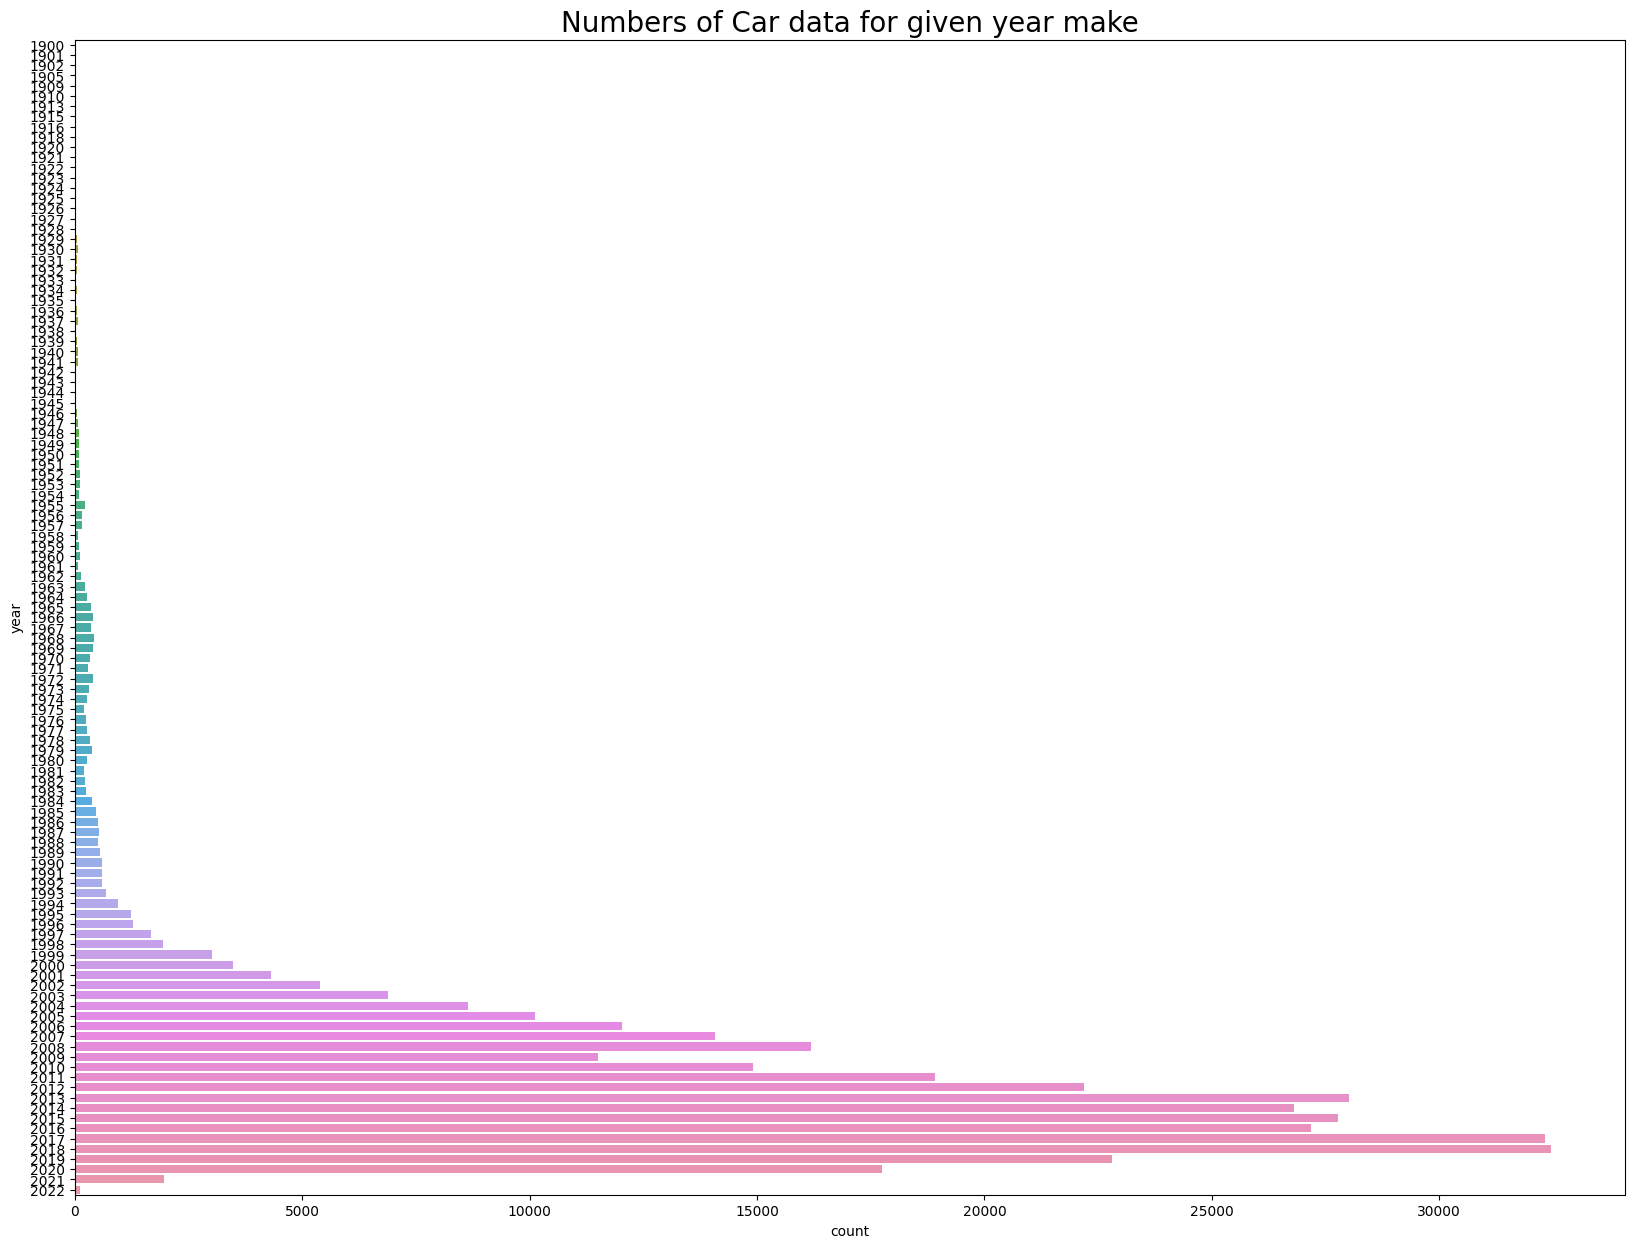

In [208]:

plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.year)
plt.title("Numbers of Car data for given year make", fontsize = 20)
plt.savefig('#_of_cars_In_a _given_year.jpg', bbox_inches='tight')
plt.show()




sns.countplot(y = UsedCar_data_r2.year) showed that there are not many cars under the year 1995, so it would help to drop them

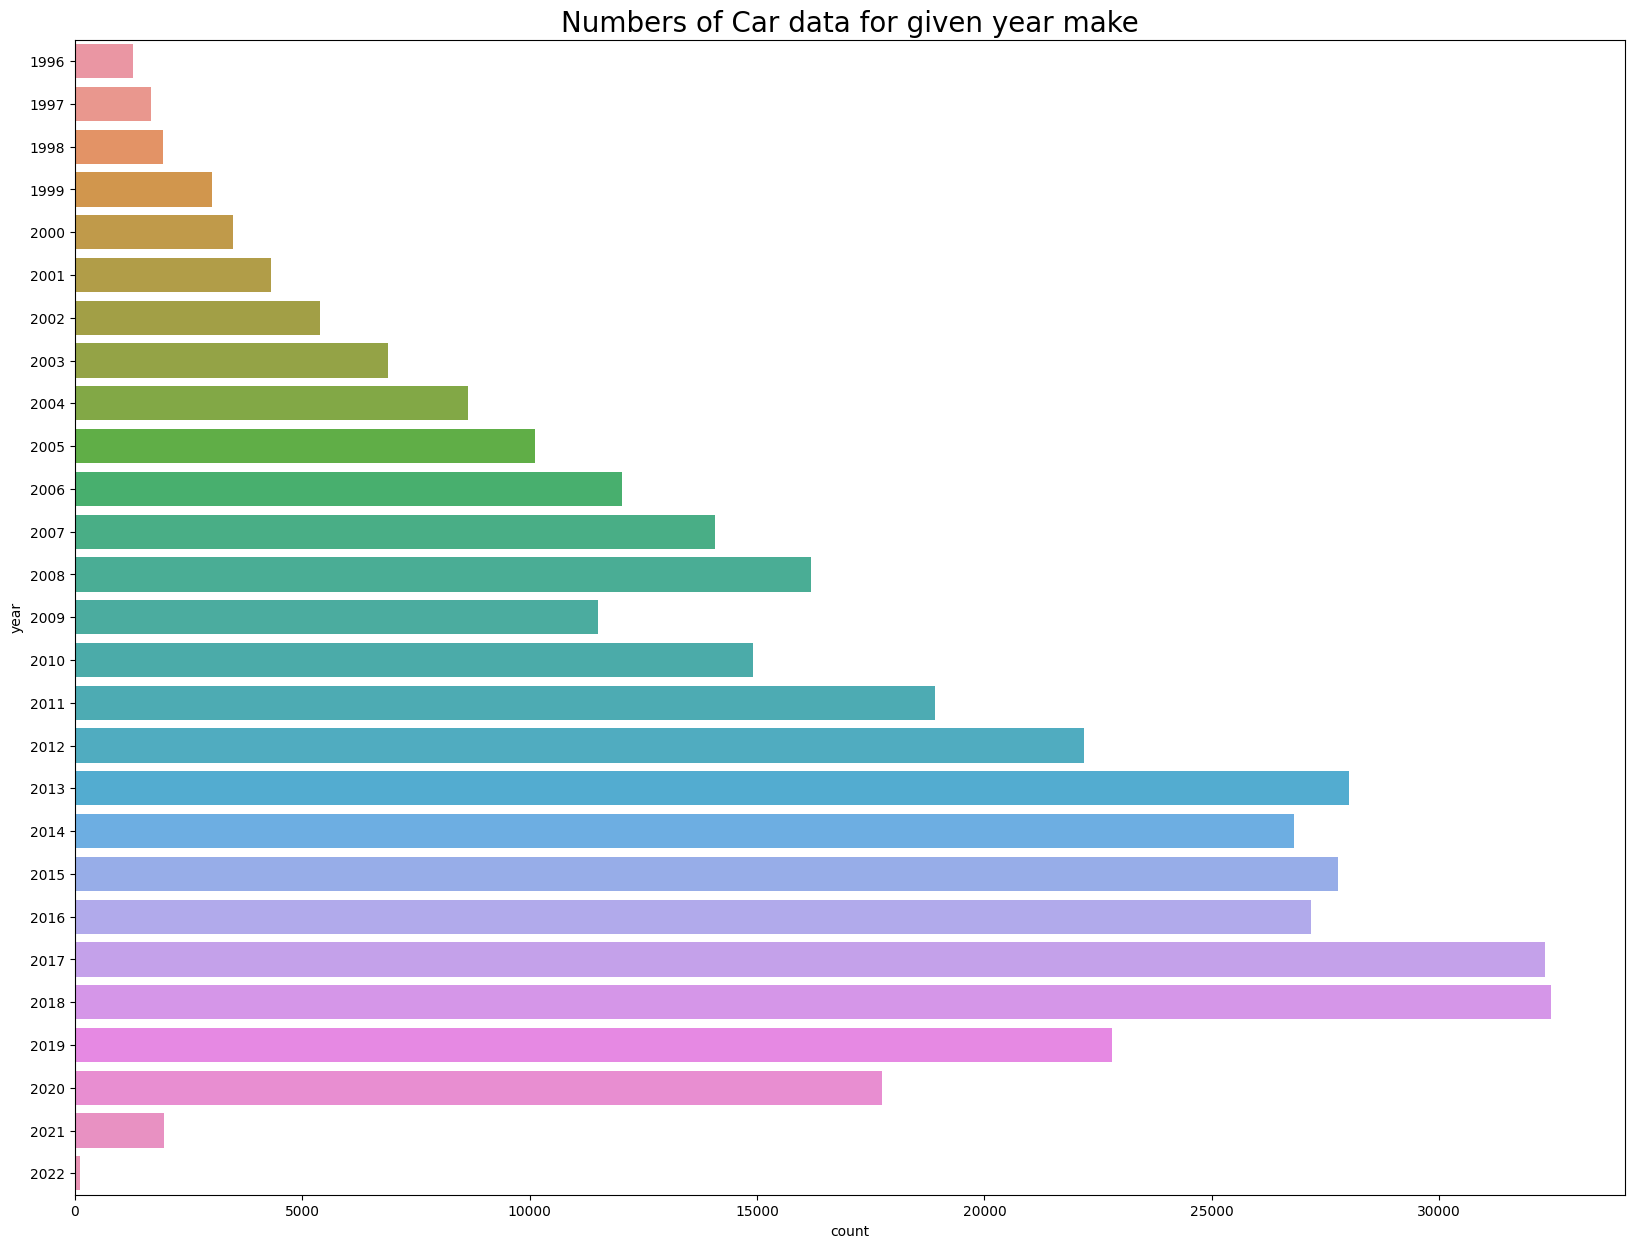

In [209]:


UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["year"] > 1995 ]
#UsedCar_data_r3 = UsedCar_data_r2[UsedCar_data_r2['year'] > 1995] 


plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.year)
plt.title("Numbers of Car data for given year make", fontsize = 20)
plt.show()

In [210]:
UsedCar_data_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373783 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         373783 non-null  Int64 
 1   year          373783 non-null  Int64 
 2   manufacturer  373783 non-null  string
 3   condition     373783 non-null  string
 4   cylinders     373783 non-null  string
 5   fuel          373783 non-null  string
 6   odometer      373783 non-null  Int64 
 7   transmission  373783 non-null  string
 8   drive         373783 non-null  string
 9   type          373783 non-null  string
 10  paint_color   373783 non-null  string
dtypes: Int64(3), string(8)
memory usage: 35.3 MB


In [211]:
# print(UsedCar_data_r2['price'].max())
# print(UsedCar_data_r2['price'].min())

UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["price"] > 3000 ]
UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["price"] < 250000 ]

# print(UsedCar_data_r2['price'].max())
# print(UsedCar_data_r2['price'].min())
# # UsedCar_data_r2_x.info()
# sns.countplot(x = UsedCar_data_r2_x.price) 

3736928711
1
249999
3045


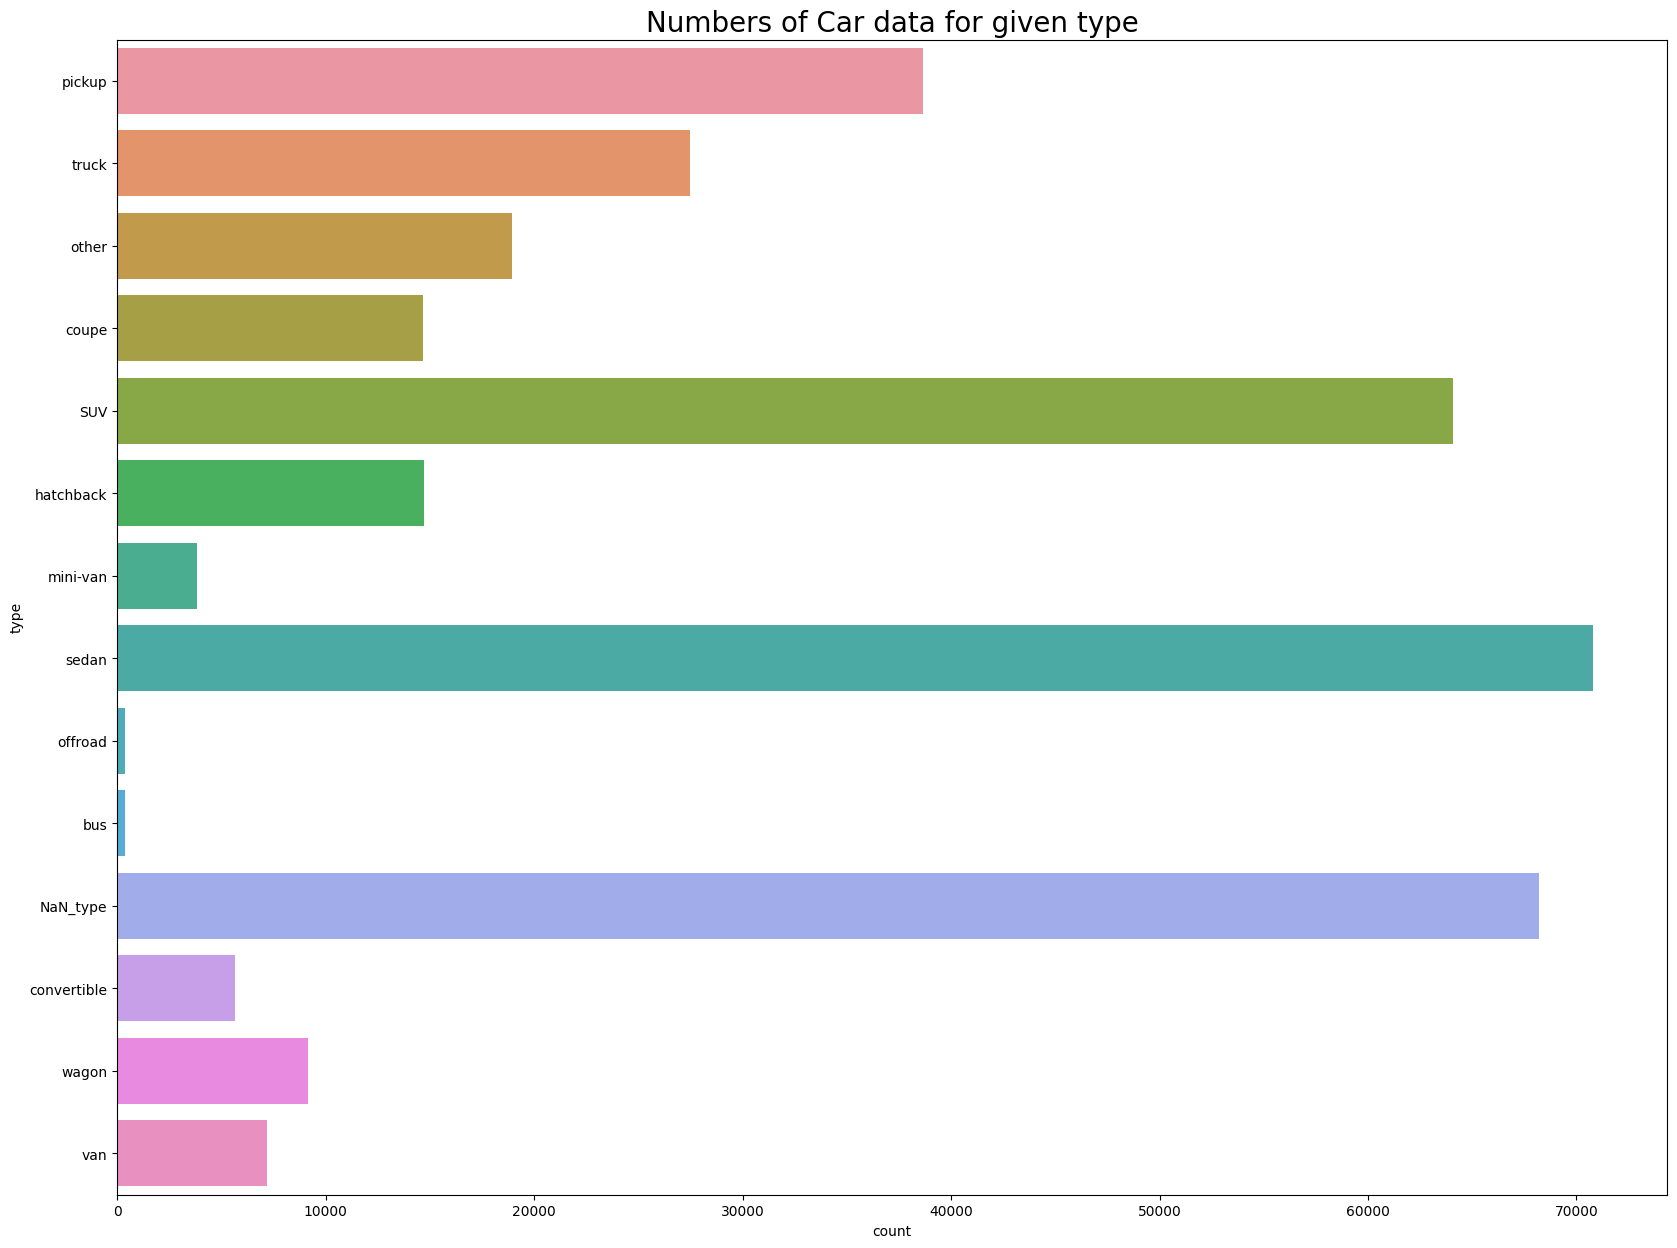

In [212]:
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.type)
plt.title("Numbers of Car data for given type", fontsize = 20)
plt.show()


Based on the result drop the rows for type = ['pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan' 'van' 'convertible' 'wagon']

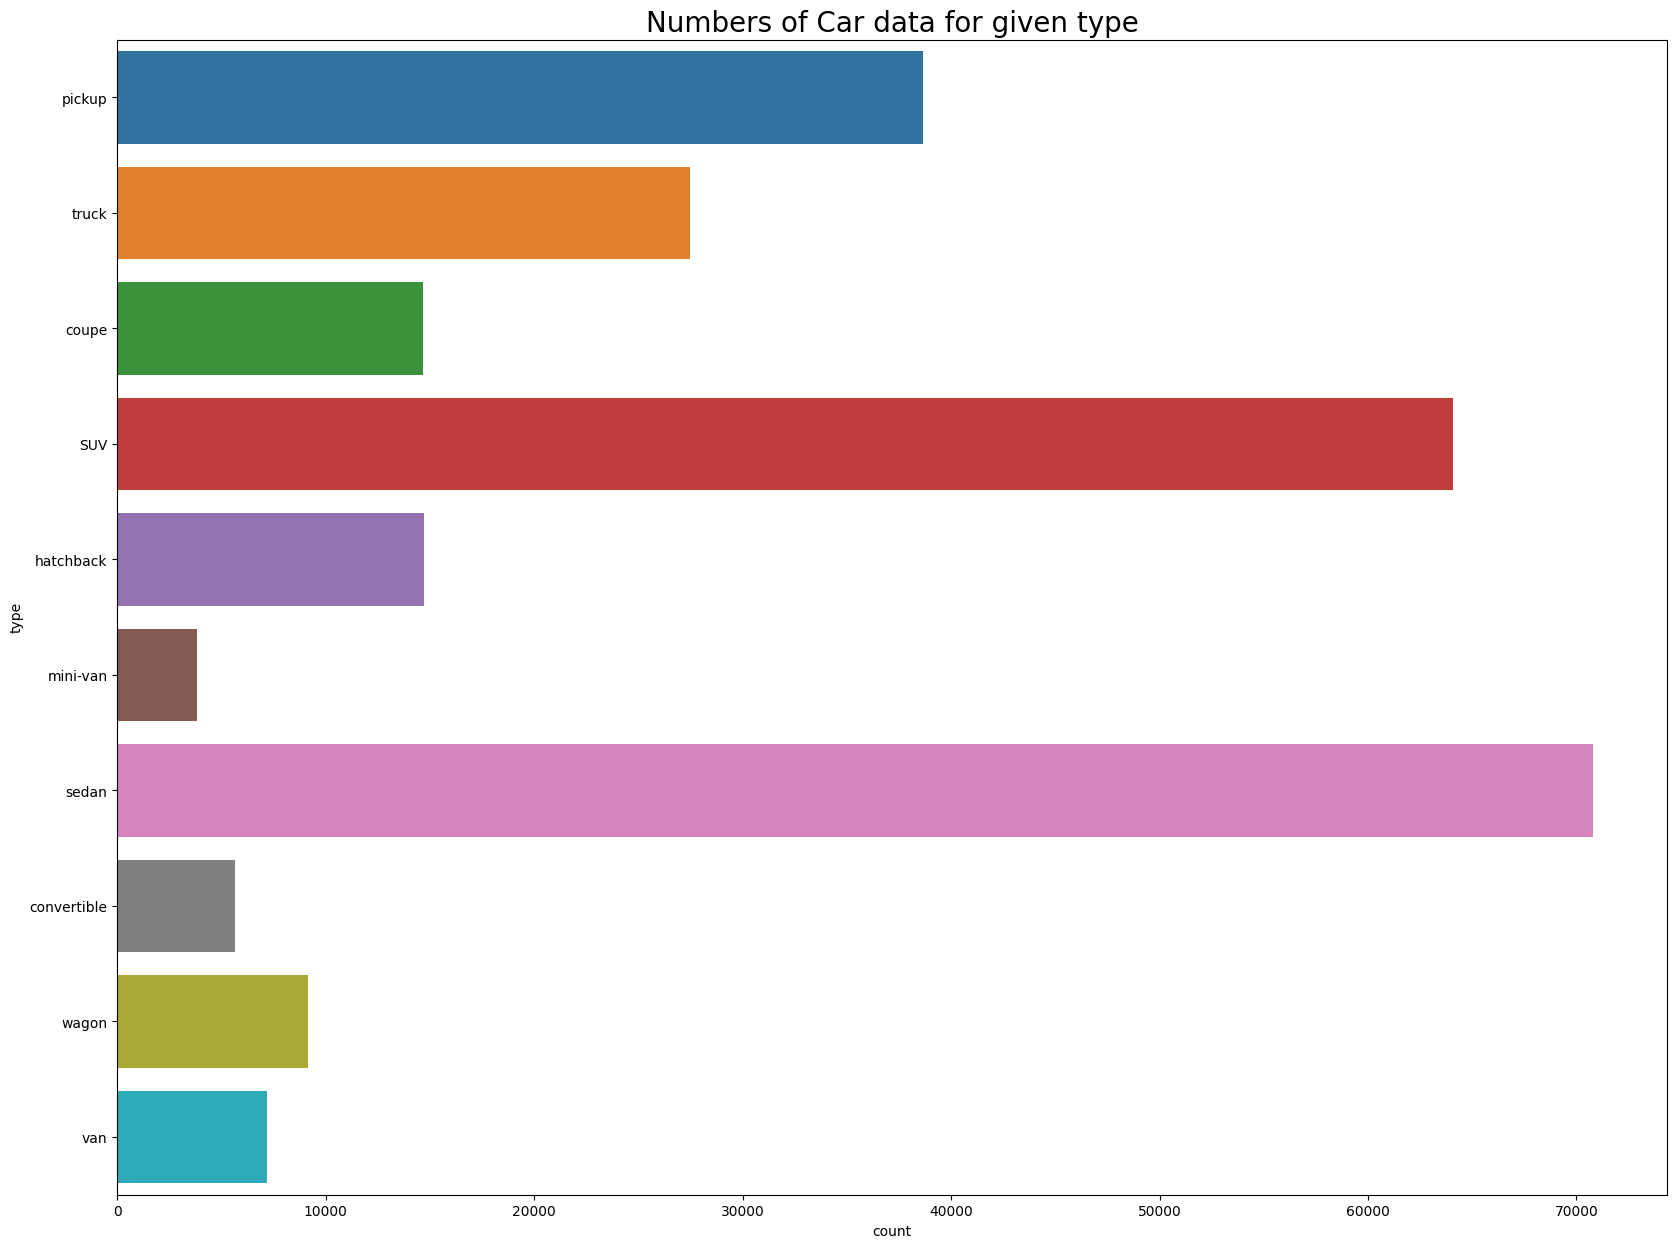

In [213]:
#print(UsedCar_data_r2["type"].unique())
UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["type"].isin(['pickup', 'truck', 'coupe', 'SUV' ,'hatchback', 'mini-van', 'sedan', 'van' ,'convertible', 'wagon'])]
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.type)
plt.title("Numbers of Car data for given type", fontsize = 20)
plt.show()


In [214]:
UsedCar_data_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256173 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         256173 non-null  Int64 
 1   year          256173 non-null  Int64 
 2   manufacturer  256173 non-null  string
 3   condition     256173 non-null  string
 4   cylinders     256173 non-null  string
 5   fuel          256173 non-null  string
 6   odometer      256173 non-null  Int64 
 7   transmission  256173 non-null  string
 8   drive         256173 non-null  string
 9   type          256173 non-null  string
 10  paint_color   256173 non-null  string
dtypes: Int64(3), string(8)
memory usage: 24.2 MB


afteer keeping only ["cylinders"].isin(['8 cylinders','6 cylinders','4 cylinders']

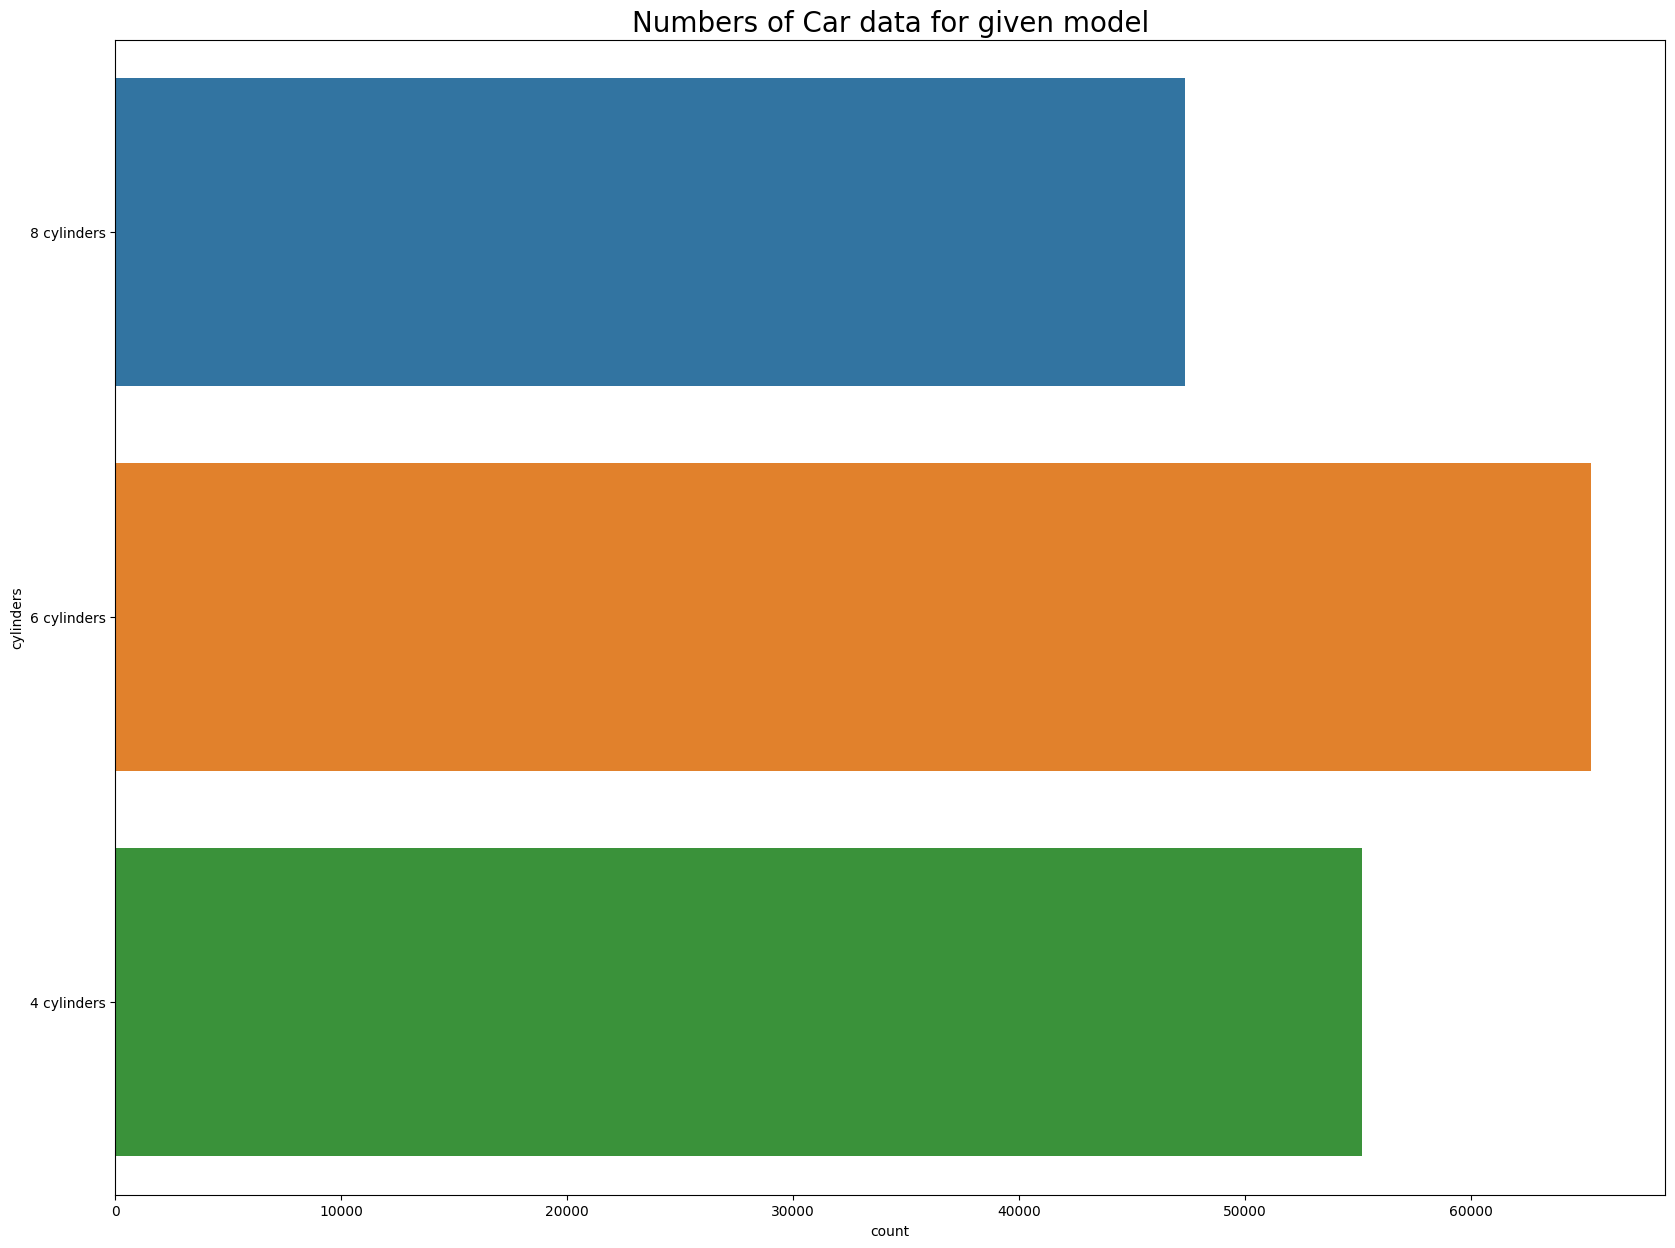

In [215]:
UsedCar_data_r2 = UsedCar_data_r2.loc[UsedCar_data_r2["cylinders"].isin(['8 cylinders','6 cylinders','4 cylinders'])]
plt.figure(figsize = (20, 15))
sns.countplot(y = UsedCar_data_r2.cylinders)
plt.title("Numbers of Car data for given model", fontsize = 20)
plt.show()


In [216]:
UsedCar_data_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 27 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         167880 non-null  Int64 
 1   year          167880 non-null  Int64 
 2   manufacturer  167880 non-null  string
 3   condition     167880 non-null  string
 4   cylinders     167880 non-null  string
 5   fuel          167880 non-null  string
 6   odometer      167880 non-null  Int64 
 7   transmission  167880 non-null  string
 8   drive         167880 non-null  string
 9   type          167880 non-null  string
 10  paint_color   167880 non-null  string
dtypes: Int64(3), string(8)
memory usage: 15.9 MB


I execuetd One-Hot Encode for features to conevr them in usefull values

In [217]:

one_hot = pd.get_dummies(UsedCar_data_r2['condition'])
UsedCar_data_r2 = UsedCar_data_r2.drop('condition',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)




In [218]:
UsedCar_data_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 27 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         167880 non-null  Int64 
 1   year          167880 non-null  Int64 
 2   manufacturer  167880 non-null  string
 3   cylinders     167880 non-null  string
 4   fuel          167880 non-null  string
 5   odometer      167880 non-null  Int64 
 6   transmission  167880 non-null  string
 7   drive         167880 non-null  string
 8   type          167880 non-null  string
 9   paint_color   167880 non-null  string
 10  excellent     167880 non-null  uint8 
 11  fair          167880 non-null  uint8 
 12  good          167880 non-null  uint8 
 13  like new      167880 non-null  uint8 
 14  new           167880 non-null  uint8 
 15  salvage       167880 non-null  uint8 
dtypes: Int64(3), string(7), uint8(6)
memory usage: 19.6 MB


In [219]:
#UsedCar_data_r2['type'].unique()
one_hot = pd.get_dummies(UsedCar_data_r2['type'])
UsedCar_data_r2 = UsedCar_data_r2.drop('type',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)


In [220]:
UsedCar_data_r2['transmission'] = UsedCar_data_r2['transmission'].replace('other','other_tarn')

one_hot = pd.get_dummies(UsedCar_data_r2['transmission'])
UsedCar_data_r2 = UsedCar_data_r2.drop('transmission',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)



In [221]:
one_hot = pd.get_dummies(UsedCar_data_r2['cylinders'])
UsedCar_data_r2 = UsedCar_data_r2.drop('cylinders',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)



In [222]:
UsedCar_data_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 27 to 426878
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         167880 non-null  Int64 
 1   year          167880 non-null  Int64 
 2   manufacturer  167880 non-null  string
 3   fuel          167880 non-null  string
 4   odometer      167880 non-null  Int64 
 5   drive         167880 non-null  string
 6   paint_color   167880 non-null  string
 7   excellent     167880 non-null  uint8 
 8   fair          167880 non-null  uint8 
 9   good          167880 non-null  uint8 
 10  like new      167880 non-null  uint8 
 11  new           167880 non-null  uint8 
 12  salvage       167880 non-null  uint8 
 13  SUV           167880 non-null  uint8 
 14  convertible   167880 non-null  uint8 
 15  coupe         167880 non-null  uint8 
 16  hatchback     167880 non-null  uint8 
 17  mini-van      167880 non-null  uint8 
 18  pickup        167880 no

In [223]:

one_hot = pd.get_dummies(UsedCar_data_r2['fuel'])
UsedCar_data_r2 = UsedCar_data_r2.drop('fuel',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)

In [224]:
one_hot = pd.get_dummies(UsedCar_data_r2['drive'])
UsedCar_data_r2 = UsedCar_data_r2.drop('drive',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)

In [225]:
one_hot = pd.get_dummies(UsedCar_data_r2['manufacturer'])
UsedCar_data_r2 = UsedCar_data_r2.drop('manufacturer',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)



In [226]:
one_hot = pd.get_dummies(UsedCar_data_r2['paint_color'])
UsedCar_data_r2 = UsedCar_data_r2.drop('paint_color',axis = 1)
UsedCar_data_r2 = UsedCar_data_r2.join(one_hot)


3


Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares




### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [227]:
#UsedCar_data_r2 = UsedCar_data_r2.drop('model',axis = 1)
UsedCar_data_r2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 27 to 426878
Data columns (total 90 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   price            167880 non-null  Int64
 1   year             167880 non-null  Int64
 2   odometer         167880 non-null  Int64
 3   excellent        167880 non-null  uint8
 4   fair             167880 non-null  uint8
 5   good             167880 non-null  uint8
 6   like new         167880 non-null  uint8
 7   new              167880 non-null  uint8
 8   salvage          167880 non-null  uint8
 9   SUV              167880 non-null  uint8
 10  convertible      167880 non-null  uint8
 11  coupe            167880 non-null  uint8
 12  hatchback        167880 non-null  uint8
 13  mini-van         167880 non-null  uint8
 14  pickup           167880 non-null  uint8
 15  sedan            167880 non-null  uint8
 16  truck            167880 non-null  uint8
 17  van              167880 non-

In [228]:
from sklearn.preprocessing import MinMaxScaler

# X = UsedCar_data_r2.drop(['price',], axis=1).values
X = UsedCar_data_r2[['year','odometer']]
y = UsedCar_data_r2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# print(y_test)
# print(y_train)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_new = scaler.transform(X_train)
# X_test_new = scaler.transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)

y_predict = model.predict(X_test)

print(mean_squared_error(y_predict, y_test))
print(mean_absolute_error(y_predict, y_test))

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
# error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
# error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

[ 1.38836734e+03 -2.26680459e-02]
124014406.59119494
8136.142567245352
Coefficients: [ 1.38836734e+03 -2.26680459e-02]
Intercept: -2772419.8165956433


Text(0, 0.5, 'Predicted Y')

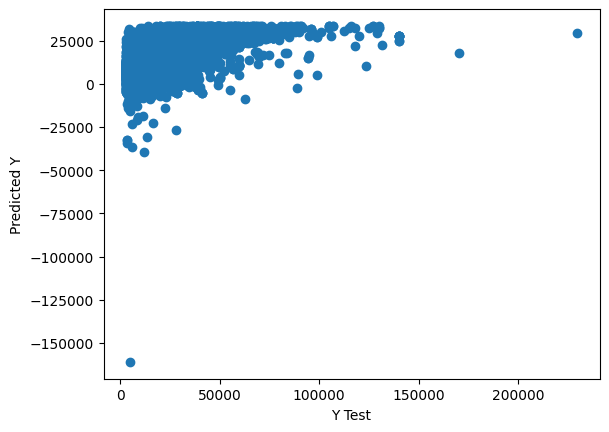

In [230]:
plt.scatter(x = y_test, y = y_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

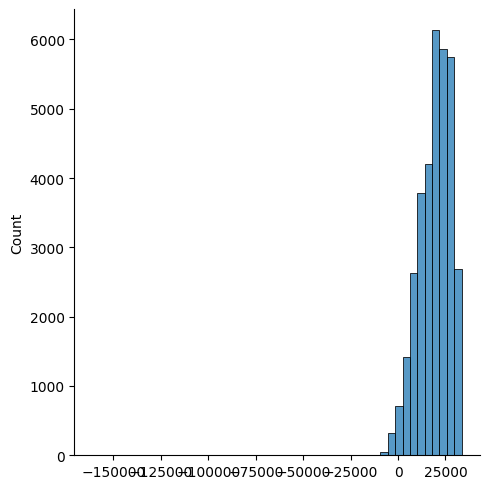

In [231]:

sns.displot((y_predict), bins = 50)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

1. R Square/Adjusted R Square

2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)

3. Mean Absolute Error(MAE


In [232]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, y_predict)
RMSE = math.sqrt(MSE)

print("Mean Square Error: ", MSE)
print("Root Mean Square Error: " ,RMSE)


Mean Square Error:  124014406.59119494
Root Mean Square Error:  11136.175581912981


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Based on the analyses, I think the dataset has a problem. To create a  good MLM, we need a dataset vetted by a business analyst with expertise in the domain ( Used car pricing) to select the right features  and have a dataset that reflects reality 